In [332]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error,mean_absolute_error
from sklearn.linear_model import Lasso

import pickle

In [297]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()
df = pd.read_csv("/content/ds_salaries.csv")
df.drop_duplicates(inplace=True)
print(df.shape)
print(df.isna().sum())
print(df.describe())
df.head()

(2584, 11)
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
         work_year        salary  salary_in_usd  remote_ratio
count  2584.000000  2.584000e+03    2584.000000   2584.000000
mean   2022.301084  2.103653e+05  133409.280186     50.483746
std       0.749179  8.080375e+05   67136.837329     48.163707
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  9.000000e+04   84975.000000      0.000000
50%    2022.000000  1.346300e+05  130000.000000     50.000000
75%    2023.000000  1.825625e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


To conduct this analysis, a dataset containing relevant information about Data Scientists was used. The dataset includes the following variables:

`work_year`:The year the salary was paid.

`experience_level`: The experience level in the job during the year.

`EN` > Entry-level / Junior
`MI`> Mid-level / Intermediate
`SE` > Senior-level / Expert
`EX` > Executive-level / Director

`employment_type`: The type of employment for the role.

`PT` > Part-time
`FT` > Full-time
`CT` > Contract
`FL` > Freelance

`job_title`: The role worked in during the year.

`salary`: The total gross salary amount paid.

`salary_currency`: The currency of the salary paid as an ISO 4217 currency code.

`salaryinusd`: The salary in USD.

`employee_residence`: Employee's primary country of residence during the work year as an ISO 3166 country code.

`remote_ratio`:The overall amount of work done remotely.

`company_location`: The country of the employer's main office or contracting branch.

`company_size`: The median number of people that worked for the company during the year.

In [298]:
len(df['job_title'].value_counts())
df['job_title'].value_counts()[:10]
df["company_location"].value_counts()
# df['remote_ratio'].value_counts()
# df['work_year'].value_counts()
# df['employee_residence'].value_counts()

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [299]:
df = df[df['job_title'].isin(df['job_title'].value_counts()[:10].index)]
df = df[df['employee_residence'].isin(df['employee_residence'].value_counts()[:11].index)]
df = df[df['company_location'].isin(df['company_location'].value_counts()[:11].index)]

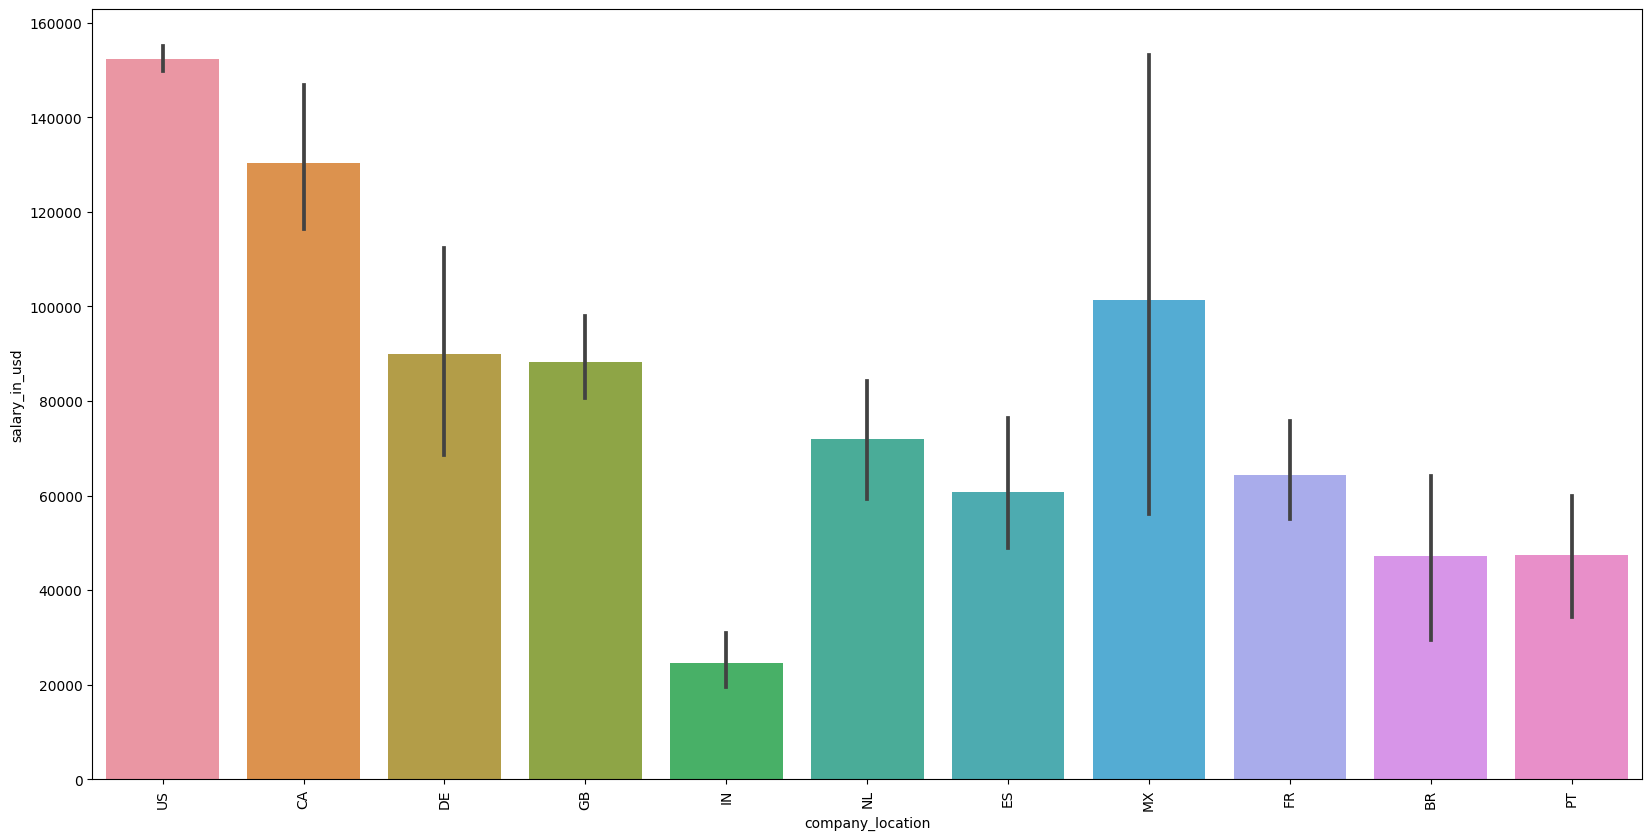

In [300]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x=df['company_location'],y=df['salary_in_usd'])
plt.xticks(rotation=90)
plt.show()

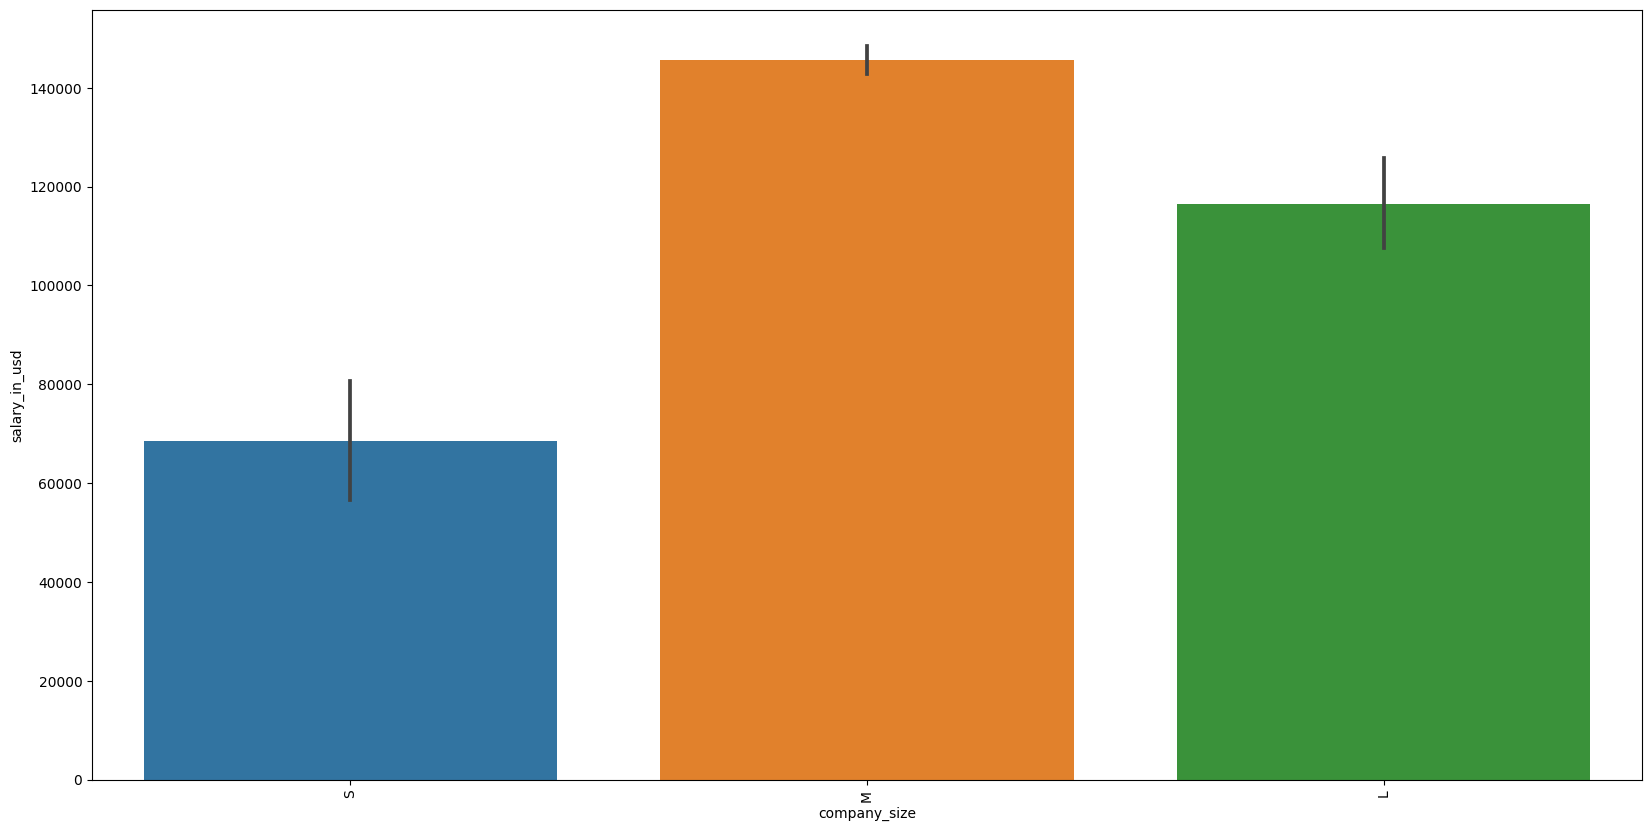

In [301]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x=df['company_size'],y=df['salary_in_usd'])
plt.xticks(rotation=90)
plt.show()

In [302]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M


In [303]:
df.drop(['salary_currency',"salary" ],axis=1, inplace=True)
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,CA,0,CA,M


In [304]:
x = df.drop('salary',axis=1)
y = df['salary']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)
train_x

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
1932,2022,EX,FT,Data Engineer,US,100,US,M
2184,2022,MI,FT,Data Analyst,US,0,US,M
1815,2023,SE,FT,Machine Learning Engineer,US,0,US,L
211,2023,SE,FT,Machine Learning Engineer,US,0,US,M
2012,2022,MI,FT,Data Analyst,GB,0,GB,M
...,...,...,...,...,...,...,...,...
2999,2022,SE,FT,Data Engineer,US,100,US,M
3087,2022,SE,FT,Data Engineer,US,0,US,L
769,2023,SE,FT,Machine Learning Engineer,GB,0,GB,M
835,2023,SE,FT,Research Scientist,US,0,US,M


In [305]:
nums = ['work_year', "remote_ratio"]
cat = [	"work_year",	"experience_level",	"employment_type",	"job_title",	"employee_residence","company_location",	"company_size"]



In [306]:

num_pipeline = Pipeline([
    ("minmax", MinMaxScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder())
])

pipeline = ColumnTransformer([
    ("num", num_pipeline,nums),
    ("cats", cat_pipeline, cat)
])

train_x = pipeline.fit_transform(train_x)

In [307]:
train_x

<1567x49 sparse matrix of type '<class 'numpy.float64'>'
	with 13297 stored elements in Compressed Sparse Row format>

In [308]:
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(train_x, train_y)

RandomForestRegressor()

In [313]:
test_s = pipeline.transform(test_x)
y_pred = rf_reg_model.predict(test_s)

In [315]:
y_pred

array([153910.22140826, 170536.89682475,  82336.37482143, 184464.48773052,
       131666.48075085, 161490.26039355, 164304.88701492, 161469.13640918,
        20990.256     ,  17383.52      ,  20817.91833333, 160337.42233201,
       169250.06330532, 132563.11811111, 143114.84282384, 124593.5707526 ,
       141394.06219676, 161490.26039355, 122083.34044079, 138941.95335973,
       164697.21869949, 161469.13640918, 153910.22140826, 131666.48075085,
        47426.02      ,  61460.62770238, 177241.49828401,  39596.14452381,
       127608.24115002,  95826.99242424, 131666.48075085, 153910.22140826,
       153910.22140826, 140993.71997777, 159524.31686702,  76708.42797944,
       161469.13640918, 161469.13640918, 132925.63551021, 162131.42285714,
       168435.23533182,  69060.63410919, 164304.88701492,  73304.1599127 ,
       171913.33333333, 160337.42233201, 168336.61619805, 132925.63551021,
       131666.48075085, 169685.29315407, 141389.75333333,  71571.37716667,
       167078.8892721 , 1

In [320]:
mean_absolute_percentage_error(y_pred,test_y)

0.28794711061165973

In [321]:
mean_absolute_percentage_error(test_y, y_pred)

0.40040368393534564

In [325]:
dtr = DecisionTreeRegressor()
dtr.fit(train_x, train_y)
dtr.predict(test_s)
mean_absolute_percentage_error(y_pred,test_y)
mean_absolute_percentage_error(test_y, y_pred)

0.40040368393534564

In [331]:
lasso_model = Lasso()
lasso_model.fit(train_x, train_y)
lasso_model.predict(test_s)
mean_absolute_percentage_error(y_pred,test_y)
mean_absolute_percentage_error(test_y, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197602025153.6831, tolerance: 611059842.9721233
  model = cd_fast.sparse_enet_coordinate_descent(


0.40040368393534564

In [333]:
import pickle
with open('dtr_model.pkl', 'wb') as file:
    pickle.dump(dtr, file)
